In [56]:
%matplotlib notebook
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)

# Trabajando con un Dataset

El dataset esta conformado por todas nuestras observaciones y sus respectivas etiquetas. Generalmente vienen en la forma $D \mapsto [\{x_1, y_1\}, \{x_2, y_2\}, \cdots, \{x_N, y_N\}]$ con $N$ el numero de observaciones.

Generalmente, cada $x_i$ esta compuesto por $M$ caracteristicas de diferente naturaleza. Estas pueden ser:
- Reales: valores numericos (Ej. peso, altura, edad, etc...)
- Nominales: valores categoricos (Ej. genero, etnia, etc...)

Para cargar datos a una variable podemos utilizar la libreria **Pandas**, tambien con Numpy si solo hay valores numericos (las recomendadas). En este caso usaremos Pandas.

[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [57]:
import pandas as pd

df = pd.read_csv("data/heart.csv", sep=";")
display(df)

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1.0,3.0,145.0,233,1,0.0,150.0,0,2.3,0,0.0,1.0,1
1,37,1.0,2.0,130.0,250,0,1.0,187.0,0,3.5,0,0.0,2.0,1
2,41,0.0,1.0,130.0,204,0,0.0,172.0,0,1.4,2,0.0,2.0,1
3,56,1.0,1.0,120.0,236,0,1.0,178.0,0,0.8,2,0.0,2.0,1
4,57,0.0,0.0,120.0,354,0,1.0,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0.0,140.0,241,0,1.0,123.0,1,0.2,1,0.0,3.0,0
299,45,1.0,3.0,110.0,264,0,1.0,132.0,0,1.2,1,0.0,3.0,0
300,68,1.0,0.0,144.0,193,1,1.0,141.0,0,3.4,1,2.0,3.0,0
301,57,1.0,0.0,130.0,131,0,1.0,115.0,1,1.2,1,1.0,3.0,0


- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- chestp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0 = no cardiac arrest 1 = yes heart attack

Para ver rapidamente informacion resumida del dataset, podemos utilizar la funcion `describe()` de los dataframe.


In [58]:
df.describe()

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,301.000000,302.000000,299.000000,303.000000,303.000000,302.000000,300.000000,303.000000,302.000000,303.000000,302.000000,302.000000,303.000000
mean,54.366337,0.681063,0.970199,131.551839,246.264026,0.148515,0.529801,149.523333,0.326733,1.043046,1.399340,0.728477,2.314570,0.544554
std,9.082101,0.466841,1.032257,17.530984,51.830751,0.356198,0.525849,22.976856,0.469794,1.161452,0.616226,1.024184,0.613026,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       301 non-null    float64
 2   chestp    302 non-null    float64
 3   trtbps    299 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   302 non-null    float64
 7   thalachh  300 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       302 non-null    float64
 12  thall     302 non-null    float64
 13  output    303 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 33.3 KB


Podemos ver que algunas de nuestras columnas en el dataset no tienen descripcion, por lo tanto no sabemos que significan, esto hace que usarlas para entrenar nuestro modelo sea un tema de debate. En esta ocacion las eliminaremos del DataFrame (tambien podriamos no cargarlas desde un principio con un argumento de `read_csv`).

In [60]:
df = df.drop(['oldpeak','slp','caa','thall'], axis=1)
#df = df.drop(df.columns[8:13], axis=1)
df

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,1.0,3.0,145.0,233,1,0.0,150.0,0,1
1,37,1.0,2.0,130.0,250,0,1.0,187.0,0,1
2,41,0.0,1.0,130.0,204,0,0.0,172.0,0,1
3,56,1.0,1.0,120.0,236,0,1.0,178.0,0,1
4,57,0.0,0.0,120.0,354,0,1.0,163.0,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0.0,140.0,241,0,1.0,123.0,1,0
299,45,1.0,3.0,110.0,264,0,1.0,132.0,0,0
300,68,1.0,0.0,144.0,193,1,1.0,141.0,0,0
301,57,1.0,0.0,130.0,131,0,1.0,115.0,1,0


Siempre al trabajar con un dataset hay que revisar por posibles observaciones incompletas.

Pandas reconoce 2 formas distintas a valores faltantes:

- None: None es el equivalentes de NULL en python.
- NaN : NaN o Not a Number. Indicando que el valor no esta definido.

Pandas trata de forma intercambiable a los campos None y NaN. Para tratarlos de alguna manera, podemos usar algunas de sus funciones como:

- isnull(): Detectar cuales son null.
- notnull(): Detectar cuales no son null.
- dropna(): Elimina todas las observaciones que contengan al menos 1 campo null.
- fillna(): Rellena los null con algun valor.


In [61]:
df.isnull()

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False


In [62]:
df.isnull().sum(axis=0)

age         0
sex         2
chestp      1
trtbps      4
chol        0
fbs         0
restecg     1
thalachh    3
exng        0
output      0
dtype: int64

En nuestro caso, optaremos por eliminar las observaciones con null.

In [63]:
df.dropna()

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,1.0,3.0,145.0,233,1,0.0,150.0,0,1
1,37,1.0,2.0,130.0,250,0,1.0,187.0,0,1
2,41,0.0,1.0,130.0,204,0,0.0,172.0,0,1
3,56,1.0,1.0,120.0,236,0,1.0,178.0,0,1
4,57,0.0,0.0,120.0,354,0,1.0,163.0,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0.0,140.0,241,0,1.0,123.0,1,0
299,45,1.0,3.0,110.0,264,0,1.0,132.0,0,0
300,68,1.0,0.0,144.0,193,1,1.0,141.0,0,0
301,57,1.0,0.0,130.0,131,0,1.0,115.0,1,0


In [64]:
df

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,1.0,3.0,145.0,233,1,0.0,150.0,0,1
1,37,1.0,2.0,130.0,250,0,1.0,187.0,0,1
2,41,0.0,1.0,130.0,204,0,0.0,172.0,0,1
3,56,1.0,1.0,120.0,236,0,1.0,178.0,0,1
4,57,0.0,0.0,120.0,354,0,1.0,163.0,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0.0,140.0,241,0,1.0,123.0,1,0
299,45,1.0,3.0,110.0,264,0,1.0,132.0,0,0
300,68,1.0,0.0,144.0,193,1,1.0,141.0,0,0
301,57,1.0,0.0,130.0,131,0,1.0,115.0,1,0


Al hacer modificaciones a un dataframe de pandas **siempre se debe guardar el resultado** o utilizar el argumento `inplace=True`

In [65]:
#df = df.dropna()
df.dropna(inplace=True)

In [66]:
df

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,1.0,3.0,145.0,233,1,0.0,150.0,0,1
1,37,1.0,2.0,130.0,250,0,1.0,187.0,0,1
2,41,0.0,1.0,130.0,204,0,0.0,172.0,0,1
3,56,1.0,1.0,120.0,236,0,1.0,178.0,0,1
4,57,0.0,0.0,120.0,354,0,1.0,163.0,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0.0,140.0,241,0,1.0,123.0,1,0
299,45,1.0,3.0,110.0,264,0,1.0,132.0,0,0
300,68,1.0,0.0,144.0,193,1,1.0,141.0,0,0
301,57,1.0,0.0,130.0,131,0,1.0,115.0,1,0


In [67]:
df.isnull().sum(axis=0)

age         0
sex         0
chestp      0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
output      0
dtype: int64

El siguiente paso consiste en visualizar los datos, como se distribuyen las caracteristicas de las observaciones y aplicar cualquier transformacion a los datos que sea necesaria.

Lo mas basico es realizar histogramas de las variables.

<IPython.core.display.Javascript object>


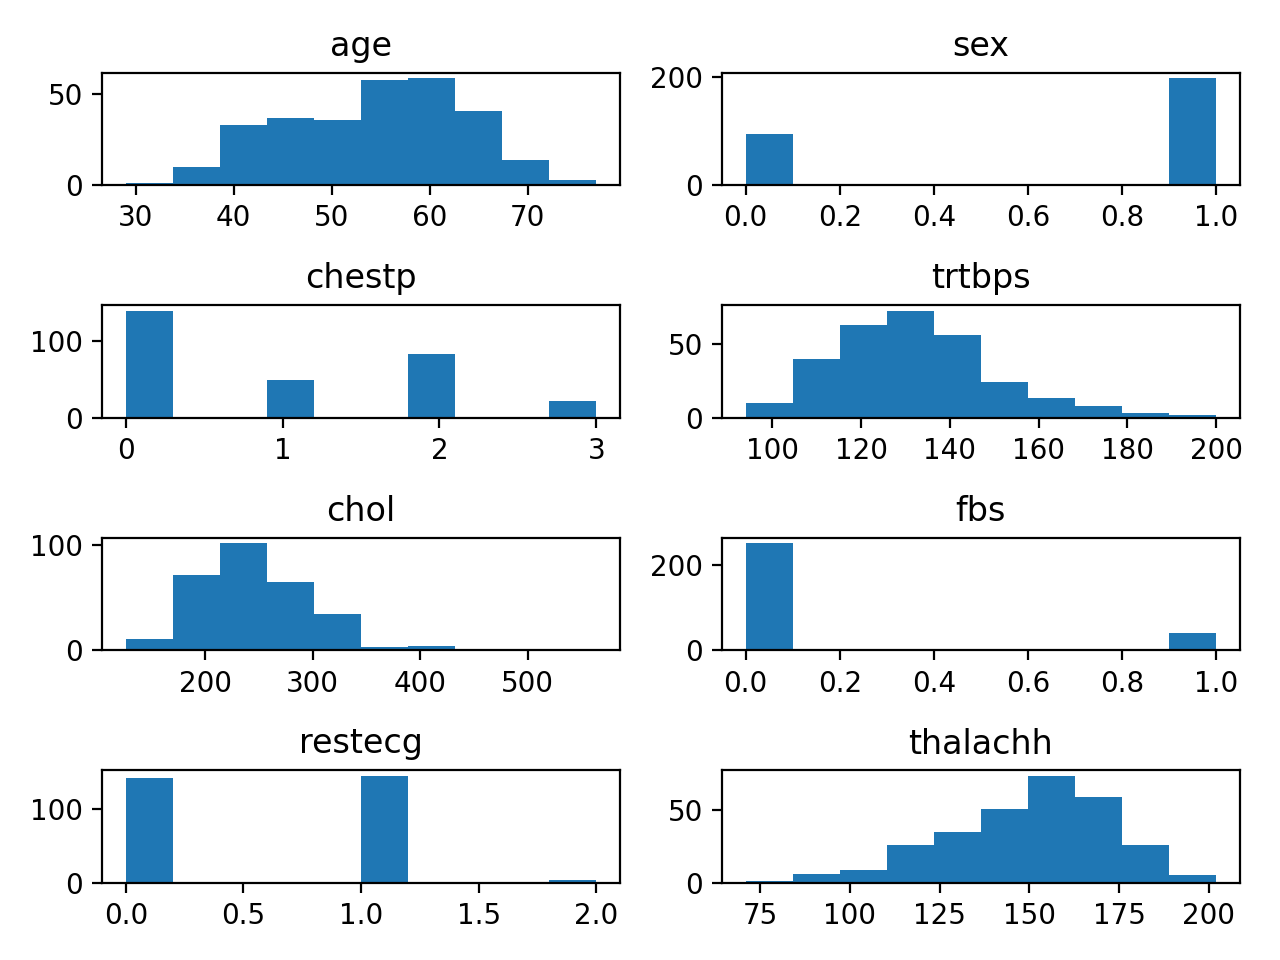

In [68]:
fig, ax = plt.subplots(4, 2, tight_layout=True)

for i in range(4):
    for j in range(2):
        ax[i,j].hist(df[df.columns[i*2+j]])
        ax[i,j].title.set_text(df.columns[i*2+j])

Y por sobretodo, ver el balance de las clases objetivos.

<IPython.core.display.Javascript object>


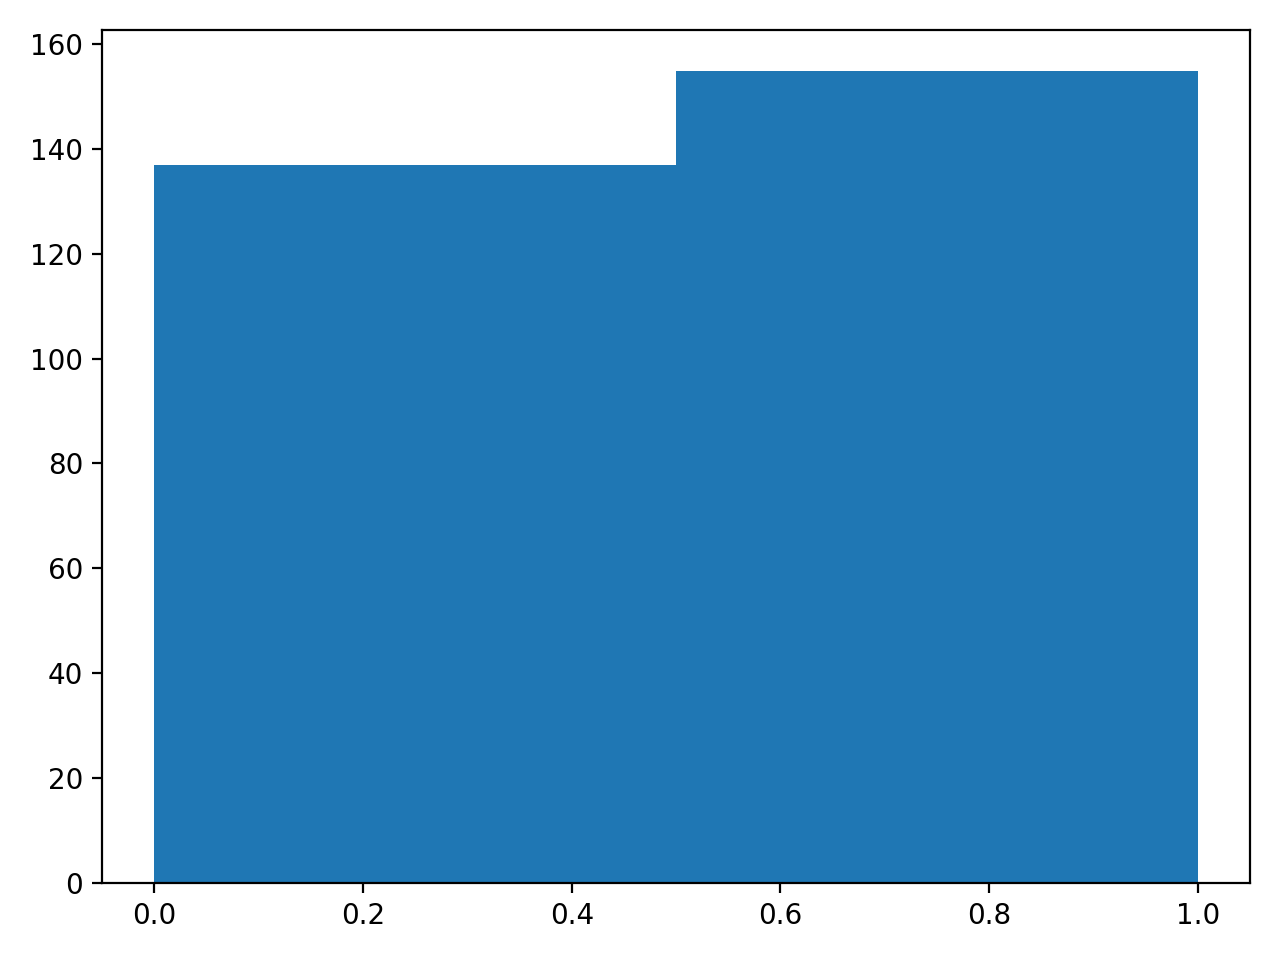

In [69]:
fig, ax = plt.subplots(tight_layout=True)
ax.hist(df[df.columns[-1]], bins=2);

Afortunadamente en nuestro caso las clases estan balanceadas. Pero que hacer en el caso de tener clases desbalanceadas?

### Clases desbalanceadas

El desbalance de clases es un problema comun en problemas de ML. Muchas veces las clases estan desbalanceadas debido a la naturaleza del problema, ya que uno de los eventos ocurre con mucha menos frecuencia, y por lo tanto, se tienen menos observaciones. Entonces recolectar mas datos es una solucion impractica.
Cuando es desbalance es pequeno, generalmente no existen dificiltades y se entrema como siempre. Pero si el desbalance es severo, se utilizan tecnicas para minimizar el sesgo del clasificador. Algunos son:

- Usar validacion cruzada submuestreando la clase dominante
- Modificar correctamente el umbral de decision.
- Agrupar los datos de la clase dominante en P datos utilizando los promedios como caracteristicas, siendo P el numero de observaciones de la clase escasa.
- Usar modelos y metricas de evaluacion robustos ante el desbalance de clases. 
- Etc...

Utilizando una matriz de correlacion podemos ver que tan correlacionadas estan nuestras caracteristicas.

In [70]:
df.corr()

,age,sex,chestp,trtbps,chol,fbs,restecg,thalachh,exng,output
age,1.000000,-0.115273,-0.066916,0.279827,0.211895,0.117565,-0.107786,-0.397422,0.087377,-0.236778
sex,-0.115273,1.000000,-0.036980,-0.051249,-0.200751,0.046388,-0.061662,-0.035096,0.134273,-0.295267
chestp,-0.066916,-0.036980,1.000000,0.032554,-0.068972,0.075057,0.049772,0.283938,-0.403782,0.433354
trtbps,0.279827,-0.051249,0.032554,1.000000,0.131135,0.173336,-0.119155,-0.052281,0.073693,-0.146580
chol,0.211895,-0.200751,-0.068972,0.131135,1.000000,0.016242,-0.144815,0.000287,0.064179,-0.083464
fbs,0.117565,0.046388,0.075057,0.173336,0.016242,1.000000,-0.086648,-0.014398,0.034948,-0.054591
restecg,-0.107786,-0.061662,0.049772,-0.119155,-0.144815,-0.086648,1.000000,0.043525,-0.070916,0.133777
thalachh,-0.397422,-0.035096,0.283938,-0.052281,0.000287,-0.014398,0.043525,1.000000,-0.363533,0.424426
exng,0.087377,0.134273,-0.403782,0.073693,0.064179,0.034948,-0.070916,-0.363533,1.000000,-0.445694
output,-0.236778,-0.295267,0.433354,-0.146580,-0.083464,-0.054591,0.133777,0.424426,-0.445694,1.000000


<IPython.core.display.Javascript object>


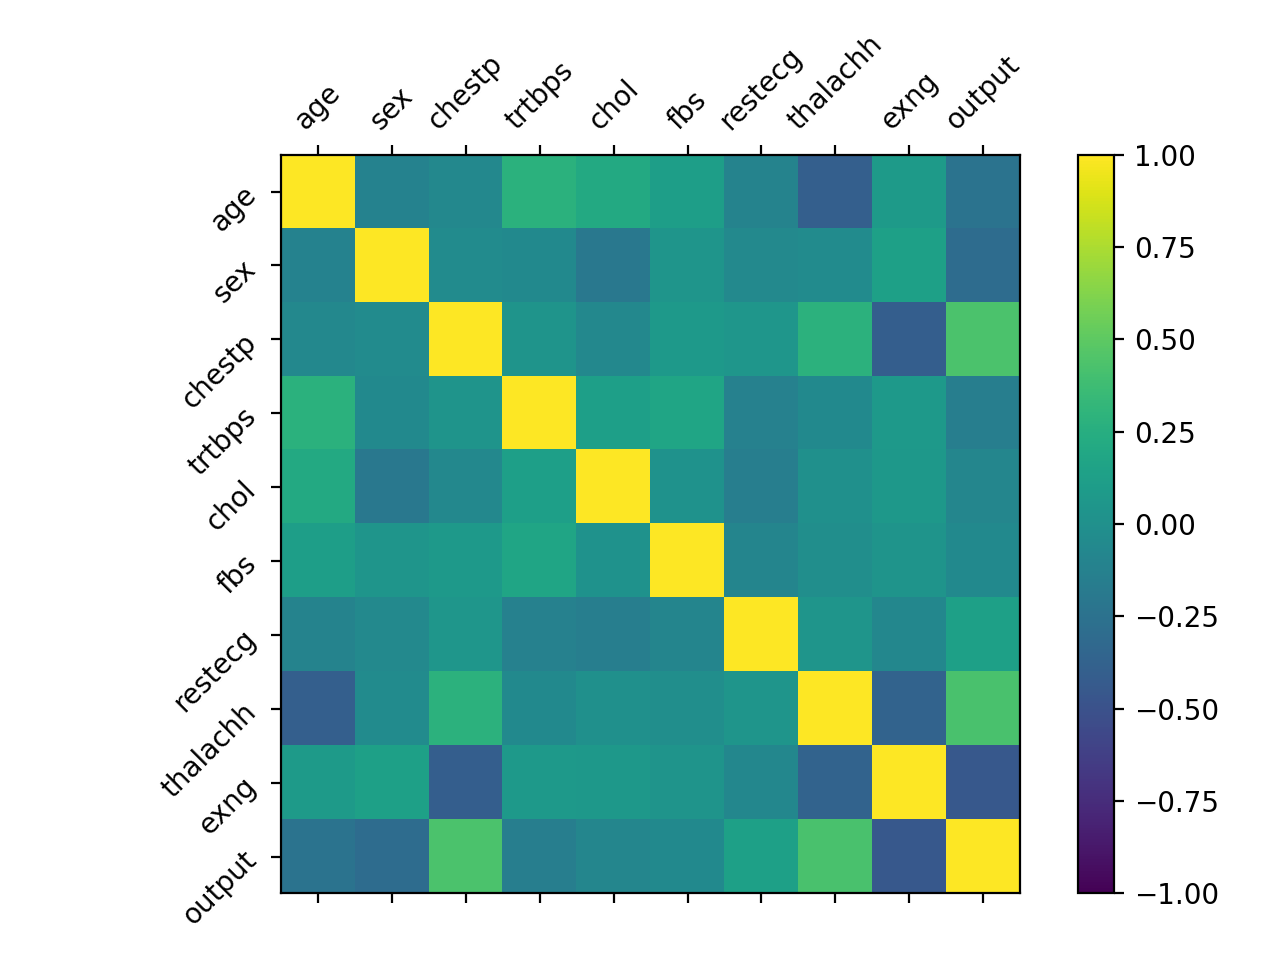

In [71]:
import matplotlib.cm as cm
fig, ax = plt.subplots(tight_layout=True)
f = ax.matshow(df.corr(), vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))

ax.set_xticklabels(df.columns,rotation=45)
ax.set_yticklabels(df.columns,rotation=45)


fig.colorbar(f, ax=ax);

En este caso en particular, las caracteristicas no estan fuertemente correlacionadas por lo que no es necesario eliminar alguna columna.

En caso de ser necesario, en este punto tambien podriamos aplicarle alguna transformacion a los datos, como pasarlos a una escala logaritmica o cambiarlos de espacio.

Tambien en caso de tener variables categoricas, estas deben ser transformadas a una representacion numerica. Existen 2 casos:
- Cuando la variable es categorica pero tiene un orden (Ej. Tallas, Calificaciones con letras, etc...). En este caso basta con asignarle un valor numero coherente con el orden de las categorias. Esto se llama Label Encoding.
- Cuando la variable es nominal, sin orden aparente (Ej. Genero, Pais, Color de ojos, etc...). Este caso es mas complejo, y existen varias soluciones propuestas en la literatura.
    - One Hot Encoding.
    - Bayesian Target Encoding.
    - Target encoding.
    - Etc...
    
Cada una tiene sus ventajas y desventajas. En esta ocacion haremos uso de One-hot encoding. En nuestro problema, le aplicaremos one-hot encoding a las columnas: `Sex`, `exang`, `chestp` y `rest_ecg`

In [72]:
df['chestp']

0      3.0
1      2.0
2      1.0
3      1.0
4      0.0
      ... 
298    0.0
299    3.0
300    0.0
301    0.0
302    1.0
Name: chestp, Length: 292, dtype: float64

In [73]:
res = enc.fit_transform(df['chestp'].values.reshape(-1,1))

In [74]:
res.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [75]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
res = enc.fit_transform(df[['sex', 'exng', 'chestp', 'restecg']])

## En caso de usar otro encoding como Label Encoding, uno puede hacer la codificacion en una linea
## df["campo"] = enc.fit_transform(df["campo"])
res

<292x11 sparse matrix of type '<class 'numpy.float64'>'
	with 1168 stored elements in Compressed Sparse Row format>

In [76]:
encoded = pd.DataFrame(res.toarray(), columns=enc.get_feature_names(), index=df.index)
encoded

,x0_0.0,x0_1.0,x1_0,x1_1,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x3_0.0,x3_1.0,x3_2.0
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
301,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
df2 = df.drop(['sex', 'exng', 'chestp', 'restecg'], axis=1)
df2

,age,trtbps,chol,fbs,thalachh,output
0,63,145.0,233,1,150.0,1
1,37,130.0,250,0,187.0,1
2,41,130.0,204,0,172.0,1
3,56,120.0,236,0,178.0,1
4,57,120.0,354,0,163.0,1
...,...,...,...,...,...,...
298,57,140.0,241,0,123.0,0
299,45,110.0,264,0,132.0,0
300,68,144.0,193,1,141.0,0
301,57,130.0,131,0,115.0,0


In [78]:
df3 = df2.join(encoded)
df3

,age,trtbps,chol,fbs,thalachh,output,x0_0.0,x0_1.0,x1_0,x1_1,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x3_0.0,x3_1.0,x3_2.0
0,63,145.0,233,1,150.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,37,130.0,250,0,187.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,41,130.0,204,0,172.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,56,120.0,236,0,178.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,57,120.0,354,0,163.0,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140.0,241,0,123.0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
299,45,110.0,264,0,132.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,68,144.0,193,1,141.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
301,57,130.0,131,0,115.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Tambien podemos hacer un analisis de componentes principales en nuestras variables numericas para disminuir la dimensionalidad agregada y la redundancia en nuestros datos.

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(df3[df3.columns[:5]])

pca.explained_variance_ratio_

array([0.75190773, 0.14841872])

In [80]:
total_variance = []
for i in range(5):
    pca = PCA(n_components = i)
    pca.fit(df3[df3.columns[:5]])
    total_variance.append(pca.explained_variance_ratio_.sum())

<IPython.core.display.Javascript object>


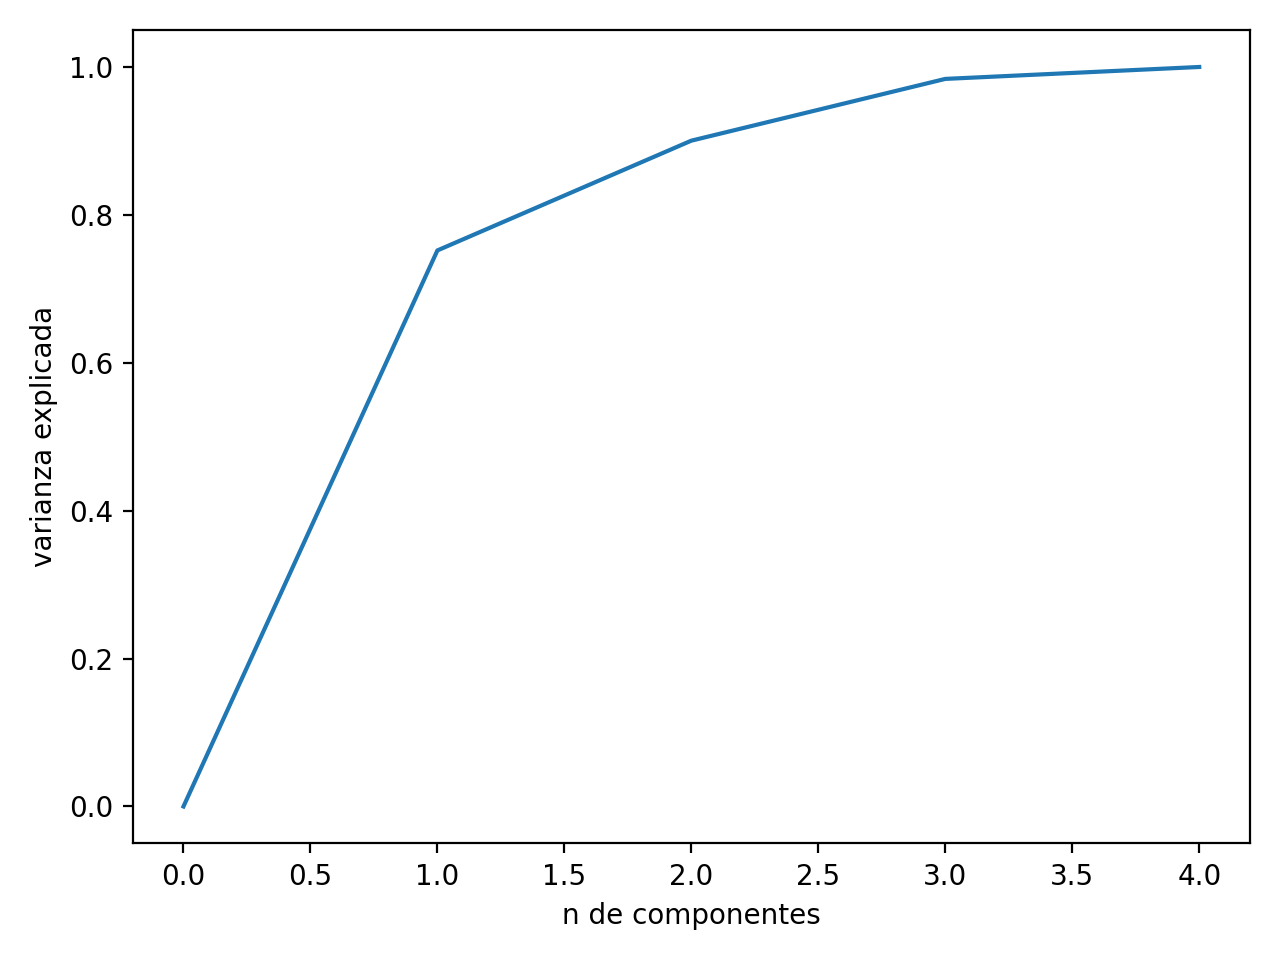

In [81]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(np.arange(5), total_variance)
ax.set_xlabel("n de componentes")
ax.set_ylabel("varianza explicada");

En nuestro caso, tenemos 5 columnas numericas, no es necesaria una disminucion de dimensionalidad con PCA. En caso de necesitarla, habria que realizar el mismo procedimiento que al hacer oneshot encoding. Eliminar los datos del Dataframe y agregar los nuevos recordando los indices.

Ya tenemos nuestro dataset limpio, preprocesado y listo para ser dividido.

In [82]:
from sklearn.model_selection import train_test_split
y = df3['output']
X = df3.drop('output', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
X_train

,age,trtbps,chol,fbs,thalachh,x0_0.0,x0_1.0,x1_0,x1_1,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x3_0.0,x3_1.0,x3_2.0
289,55,128.0,205,0,130.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
164,38,138.0,175,0,173.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
278,58,136.0,319,1,152.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
85,67,115.0,564,0,160.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
28,65,140.0,417,1,157.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,54,132.0,288,1,159.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
149,42,130.0,180,0,150.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
141,43,115.0,303,0,181.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
124,39,94.0,199,0,179.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [84]:
y_test

117    1
136    1
296    0
106    1
34     1
229    0
209    0
247    0
107    1
254    0
94     1
269    0
0      1
233    0
246    0
75     1
293    0
237    0
302    0
286    0
217    0
35     1
207    0
188    0
82     1
257    0
38     1
129    1
263    0
146    1
268    0
181    0
137    1
99     1
248    0
294    0
176    0
232    0
180    0
208    0
22     1
6      1
104    1
156    1
128    1
234    0
204    0
48     1
25     1
3      1
166    0
200    0
165    0
72     1
196    0
179    0
126    1
151    1
87     1
Name: output, dtype: int64

Pero antes de entrenar, necesitamos saber que es la **Validacion Cruzada**.

# Validacion Cruzada

Dividir el dataset en 2 sets de tamano fijo puede ser problematico si el set de entrenamiento es pequeno, ya que implica incertidumbre estadistica al rededor del error promedio estimado. Esto hace que sea dificil decir que un algoritmo es mejor que otro.

Generalmente cuando el dataset tiene miles de ejemplos, esto no es un problema. Sin embargo, cuando es pequeno existen procedimientos que permiten usar todos los ejemplos en la estimacion de la media del error, con el precio de un costo computacional incrementado.

Estos procedimientos se basan en repetir las fases de entrenamiento y prueba en diferentes sets, escogidos al azar.

Sin embargo, si pasamos cambiando el set de pruebas, como podremos comparar nuestro modelo con otro (potencialmente de otra persona). Para solucionar esto, uno puede dividir el set de entrenamiento en 2 sets excluyentes. Obteniendo asi, un set de entrenamiento mas pequeno y un set de validacion.

Entonces la idea es utilizar el set de entrenamiento y de validacion para ajustar el modelo, y el set de prueba para la evaluacion final.

![](sets.png)

Sin embargo, cuando el dataset es pequeno, es probable que ocurran muestreos de sets invalanceados. Es decir, que los datos con los que se valida, no sean representativos. 

Una solucion es utilizar **Validacion Cruzada**.

La idea principal de la validacion cruzada es dividir el set de entrenamiento en K grupos, y realizar K-1 entrenamientos, donde en cada entrenamiento (o split) el set de validacion cambia de grupo.

*Cada observacion aparece una vez en el set de validacion y K-1 en el de entrenamiento*


![kfold](kfold.png)

# K-fold Cross Validation

K-fold consiste en escoger un $K\lt N$ (cuando $K = N$ se llama Leave One Out) y llevar a cabo el procedimiento general de validacion cruzada. K-fold a diferencia de otros metodos de validacion cruzada, escoge los grupos al azar.

In [85]:
from sklearn.model_selection import KFold

kfcv = KFold(n_splits = 5, shuffle=False)
kfcv.split(X_train)

<generator object _BaseKFold.split at 0x16e80a120>

In [86]:
rn = range(1,26)
for train_index, test_index in kfcv.split(rn):
    print(train_index, test_index)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]


### Entrenando con Kfold

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

folds = 4
kfcv = KFold(n_splits = folds, shuffle=False)

accuracys = np.zeros(folds)
i=0
for train_index, valid_index in kfcv.split(X_train):
    model = LogisticRegression(solver='newton-cg')
    model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    res = model.predict(X_train.iloc[valid_index])
    
    accuracys[i] = accuracy_score(y_true=y_train.iloc[valid_index], y_pred=res)
    print(accuracy_score(y_true=y_train.iloc[valid_index], y_pred=res))
    i+=1
np.average(accuracys)

0.7796610169491526
0.8620689655172413
0.7586206896551724
0.7931034482758621


0.798363530099357

In [88]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)
res = model.predict(X_test)
accuracy_score(y_true=y_test, y_pred=res)

0.6949152542372882

## Usando CV para tunear hiperparametros

Podemos combinar CV con una busqueda de grilla para hallar los mejores hiperparametros para nuestro modelo. Esto es computacionalmente costoso, pero en datasets pequenos o modelos simples, es perfectamente factible. Utilizamos CV para estar seguros de los resultados.

Consiste en un procedimiento simple e intuitivo: Realizar CV para cada combinacion de hiperpametros y comparar los resultados.

Con Scikit Learn se puede automatizar de la siguiente manera.

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [89]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

hiperparametros = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 'solver' : ('newton-cg', 'liblinear', 'sag', 'saga')}

clf = GridSearchCV(model, hiperparametros)

clf.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [90]:
clf.best_estimator_

LogisticRegression(solver='liblinear')

In [91]:
clf.best_score_

0.7893617021276595

In [92]:
res = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=res)

0.6949152542372882

<IPython.core.display.Javascript object>


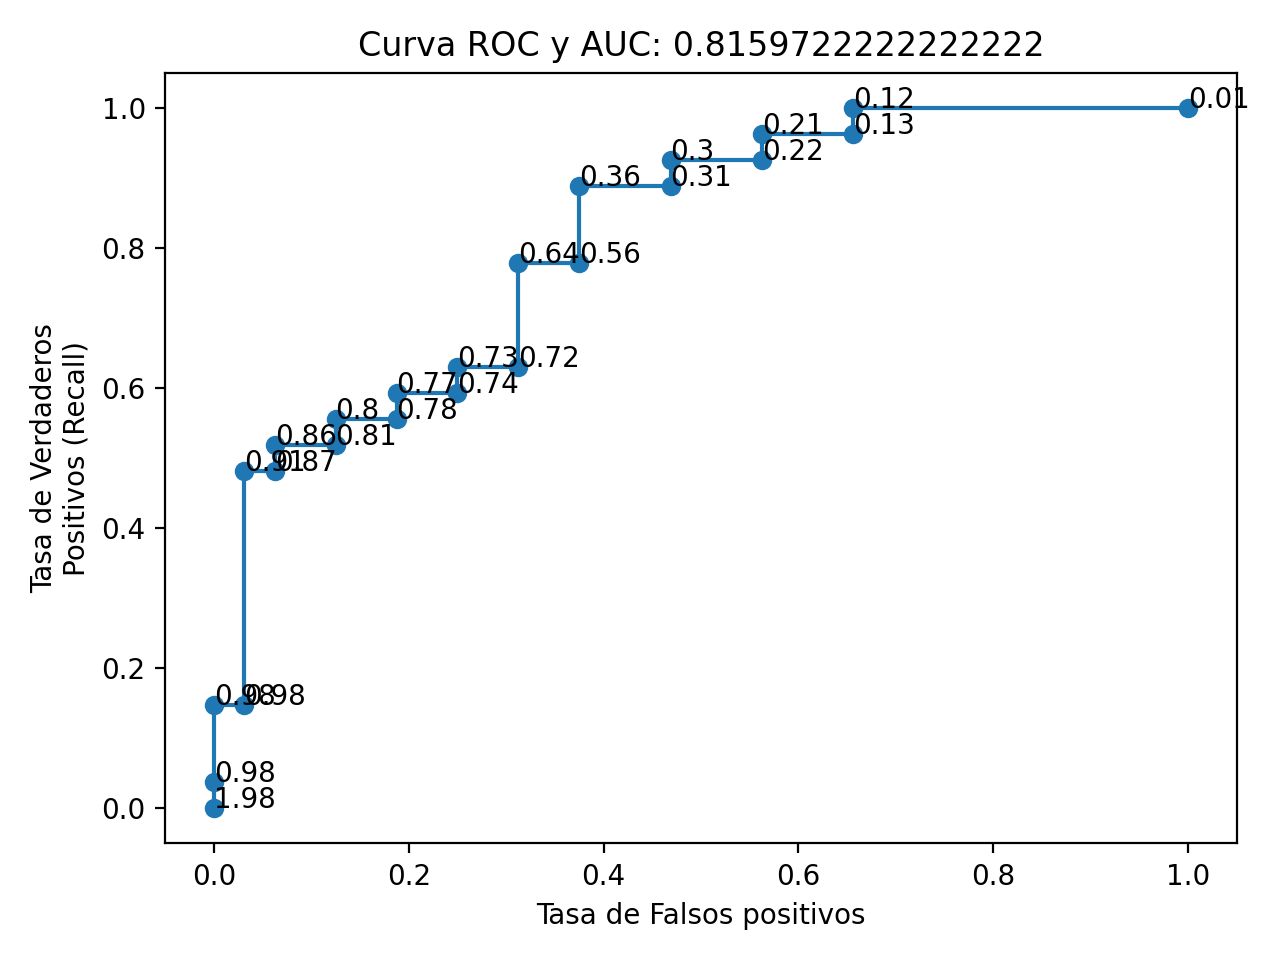

Text(0.5, 1.0, 'Curva ROC y AUC: 0.8159722222222222')

In [93]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
probability = clf.predict_proba(X_test)


fpr, tpr, th = roc_curve(y_true=y_test, y_score=probability[:,1])

fig, ax = plt.subplots(tight_layout=True)
ax.plot(fpr, tpr, marker='o');
i=0
for xy in zip(fpr, tpr):                                       # <--
    ax.annotate( np.round(th[i], 2), xy=xy, textcoords='data')
    i+=1
ax.set_xlabel('Tasa de Falsos positivos')
ax.set_ylabel('Tasa de Verdaderos\nPositivos (Recall)')
ax.set_title(f'Curva ROC y AUC: {auc(fpr, tpr)}')